In [1]:
import pandas as pd
df = pd.read_csv("/content/maaslar.csv")
df.head()

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500


Task : Predict Mass from SVR data
1.Load the dataset & separate X & Y
2.Convert X & Y to 2D array
3.Split the Data 70% & 30%
4.Call SVR from sklearn.svm kernel
5.use model hyperparameters-kernel,c,gamma
6.Calculate MSE,RMSE,R^2,plot between actual & predicted value
7.Use GridsearchCV



In [3]:
X = df["Egitim Seviyesi"]
Y = df["maas"]
Y

,maas
0,2250
1,2500
2,3000
3,4000
4,5500
5,7500
6,10000
7,15000
8,25000
9,50000


In [7]:
import numpy as np
y = np.array(Y).reshape(-1,1)
x = np.array(X).reshape(-1,1)
y

array([[ 2250],
       [ 2500],
       [ 3000],
       [ 4000],
       [ 5500],
       [ 7500],
       [10000],
       [15000],
       [25000],
       [50000]])

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)
y_test

array([[25000],
       [ 2500],
       [ 7500]])

In [10]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100, gamma=0.1)
svr.fit(X_train, y_train.ravel())

SVR(C=100, gamma=0.1)

In [22]:
y_pred = svr.predict(X_test)
y_pred

array([5798.70038936, 5324.9154686 , 5623.61585675])

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

MSE : 126730290.53184545
RMSE: 11257.454886955818
R²  : -0.36187774899893643


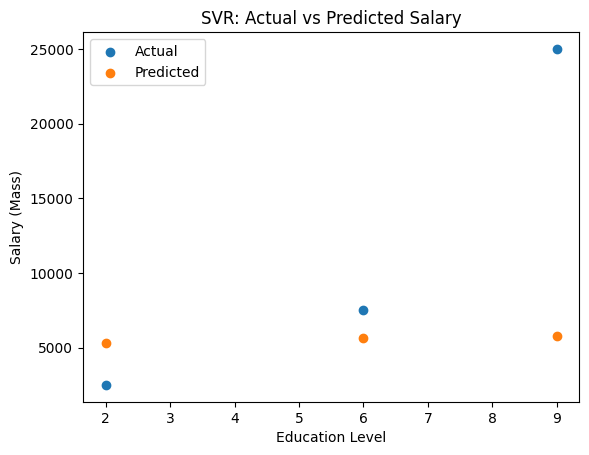

In [23]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_pred, label="Predicted")
plt.xlabel("Education Level")
plt.ylabel("Salary (Mass)")
plt.title("SVR: Actual vs Predicted Salary")
plt.legend()
plt.show()

In [33]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Base SVR model
svr = SVR()

# Hyperparameter grid
param_grid = {
    'kernel': ['rbf'],
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# GridSearch with parallel processing
grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Train GridSearch
grid_search.fit(X_train, y_train.ravel())

# Best optimized model
best_svr = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [34]:
y_pred = best_svr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

MSE : 131081363.24265178
RMSE: 11449.07696029037
R²  : -0.40863554529416857


In [35]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
param_grid = {
    'kernel': ['linear'],
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train.ravel())

best_svr = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [36]:
y_pred = best_svr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

MSE : 130077171.33333333
RMSE: 11405.137935743405
R²  : -0.39784422925373164
